In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import figure 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_absolute_error
#from skfeature.function.similarity_based import fisher_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
#pip install skfeature-chappers#pip install

In [3]:
heart_data = pd.read_csv('/content/drive/MyDrive/Datasets/archive_2/heart.csv')

In [ ]:
heart_data.head() #head of heart dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
heart_data.shape

(1025, 14)

In [ ]:
#Heart Disease dataset public data set
heart_data.isnull().sum() #null değeri yok 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
heart_data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
heart_data.describe() #heart disease data set describe

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


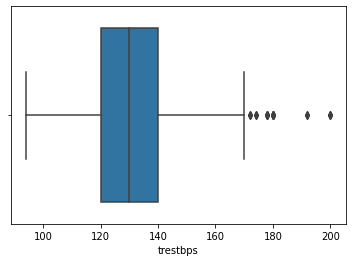

In [ ]:
#outlier value control
sns.boxplot(heart_data.trestbps) #outlier values are small 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


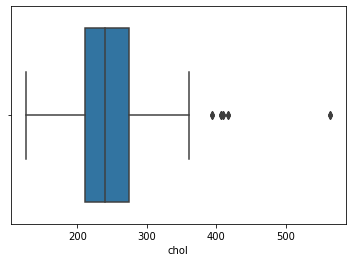

In [ ]:
sns.boxplot(heart_data.chol) #outlier values are small

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


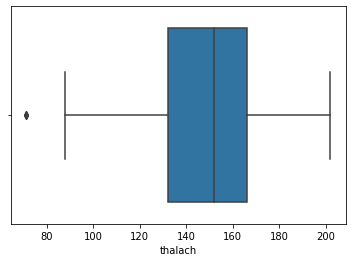

In [ ]:
sns.boxplot(heart_data.thalach) #outlier values are small

(-1.1081064432547034,
 1.1003860211073668,
 -1.1105416673836532,
 1.1054469120721713)

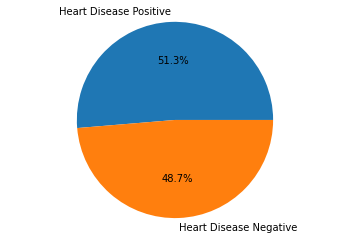

In [ ]:
with_heart_disease = heart_data.loc[heart_data["target"] == 1].shape[0] #with disease positive labels
without_heart_disease = heart_data.loc[heart_data["target"] == 0].shape[0] #no disease negative labels 
disease = [with_heart_disease, without_heart_disease] #disease
labels = ["Heart Disease Positive", "Heart Disease Negative"] #heart disease 
plt.pie(disease, labels = labels, autopct='%1.1f%%') #pie 
plt.axis('equal') #equal
# balanced data set, no null values, outliera are small 

In [4]:
#normalization min max for easy KNN computation linear data computable data
#chol, thalac, oldpeak, 
scaler = MinMaxScaler()
scaler.fit(heart_data)
scaled_data = scaler.fit_transform(heart_data)
scaled_heart = pd.DataFrame(scaled_data, columns = heart_data.columns)

In [ ]:
scaled_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1.0,0.0,0.292453,0.196347,0.0,0.5,0.740458,0.0,0.161290,1.0,0.50,1.000000,0.0
1,0.500000,1.0,0.0,0.433962,0.175799,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0.0
2,0.854167,1.0,0.0,0.481132,0.109589,0.0,0.5,0.412214,1.0,0.419355,0.0,0.00,1.000000,0.0
3,0.666667,1.0,0.0,0.509434,0.175799,0.0,0.5,0.687023,0.0,0.000000,1.0,0.25,1.000000,0.0
4,0.687500,0.0,0.0,0.415094,0.383562,1.0,0.5,0.267176,0.0,0.306452,0.5,0.75,0.666667,0.0


In [ ]:
scaled_heart.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target      float64
dtype: object

In [5]:
scaled_heart['target'] = scaled_heart['target'].astype(int) #turn target to int

In [6]:
scaled_heart['fbs'] = scaled_heart['fbs'].astype(int) #scale the fbs
scaled_heart['exang'] = scaled_heart['exang'].astype(int) #scale the exang
scaled_heart['sex'] = scaled_heart['sex'].astype(int) #scale sex

In [ ]:
scaled_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.479167,1,0.0,0.292453,0.196347,0,0.5,0.740458,0,0.161290,1.0,0.50,1.000000,0
1,0.500000,1,0.0,0.433962,0.175799,1,0.0,0.641221,1,0.500000,0.0,0.00,1.000000,0
2,0.854167,1,0.0,0.481132,0.109589,0,0.5,0.412214,1,0.419355,0.0,0.00,1.000000,0
3,0.666667,1,0.0,0.509434,0.175799,0,0.5,0.687023,0,0.000000,1.0,0.25,1.000000,0
4,0.687500,0,0.0,0.415094,0.383562,1,0.5,0.267176,0,0.306452,0.5,0.75,0.666667,0


In [ ]:
scaled_heart.dtypes

age         float64
sex           int64
cp          float64
trestbps    float64
chol        float64
fbs           int64
restecg     float64
thalach     float64
exang         int64
oldpeak     float64
slope       float64
ca          float64
thal        float64
target        int64
dtype: object

In [ ]:
scaled_data.shape

(1025, 14)

In [7]:
#KNN algorithm K-Nearest Neighbor Gaussian Naive Bayes algoritması multilayer perceptron- split data hold out metot
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
X = scaled_heart.loc[:, features]
y = scaled_heart.loc[:, ['target']]

In [ ]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X, scaled_heart.target, random_state = 42, train_size = .70) #hold out metot

In [ ]:
#uzaklık metriği euclidean distance 5 and 7 neighbors 
knn_euc = KNeighborsClassifier(n_neighbors = 5, metric="euclidean") #euclidean distance
knn_euc.fit(X_train_h, y_train_h) #fit
y_predict = knn_euc.predict(X_test_h) #predict

In [ ]:
# classification report for 5 neighbors euclidean 
print('Accuracy:', metrics.accuracy_score(y_test_h, y_predict))

Accuracy: 0.8538961038961039


In [ ]:
print(classification_report(y_test_h, y_predict)) #classification report for 5 

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       159
           1       0.85      0.85      0.85       149

    accuracy                           0.85       308
   macro avg       0.85      0.85      0.85       308
weighted avg       0.85      0.85      0.85       308



In [ ]:
knn_euc = KNeighborsClassifier(n_neighbors = 7, metric="euclidean") #euclidean distance
knn_euc.fit(X_train_h, y_train_h) #fit 
y_predict = knn_euc.predict(X_test_h) #predict 

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test_h, y_predict))

Accuracy: 0.8571428571428571


In [ ]:
print(classification_report(y_test_h, y_predict))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       159
           1       0.84      0.87      0.85       149

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [ ]:
knn_euc = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean") #euclidean distance 
knn_euc.fit(X_train_h, y_train_h) #fit
y_predict = knn_euc.predict(X_test_h) #predict

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test_h, y_predict)) #k = 3 value 

Accuracy 0.9383116883116883


In [ ]:
print(classification_report(y_test_h, y_predict)) #k = 3 probably optimum 

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       159
           1       0.98      0.89      0.93       149

    accuracy                           0.94       308
   macro avg       0.94      0.94      0.94       308
weighted avg       0.94      0.94      0.94       308



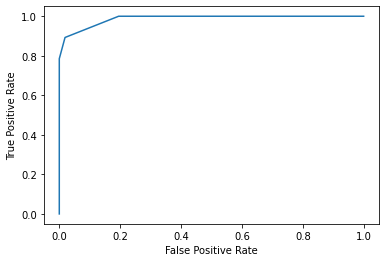

In [ ]:
#roc curve for optimum KNN Model euclidean hold out 
y_pred_proba = knn_euc.predict_proba(X_test_h)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_h, y_pred_proba)

#plot curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

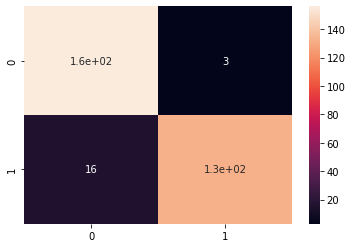

In [ ]:
#confusion matrix for optimum 
conf_m = confusion_matrix(y_test_h, y_predict)
sns.heatmap(conf_m, annot=True) 

In [ ]:
#elbow method for optimal k value euclidean distance hold out method
error_rate = []
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors = i, metric = "euclidean")
  knn.fit(X_train_h, y_train_h)
  pred_i = knn.predict(X_test_h)
  error_rate.append(np.mean(pred_i != y_test_h))


Text(0, 0.5, 'Error Rate')

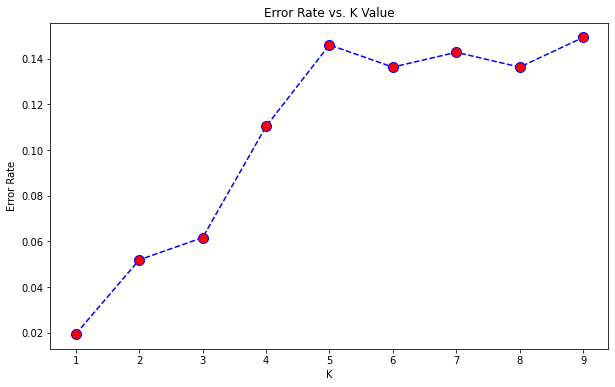

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate") # 2 and 3 optimum values slight difference we choose 3

In [ ]:
#holdout manhattan metric knn 
knn_m = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan') #manhattan distance
knn_m.fit(X_train_h, y_train_h)
y_pred = knn_m.predict(X_test_h)

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test_h, y_pred)) #k = 5 value 

Accuracy 0.8701298701298701


In [ ]:
print(classification_report(y_test_h, y_pred)) #manhattan 5

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       159
           1       0.86      0.88      0.87       149

    accuracy                           0.87       308
   macro avg       0.87      0.87      0.87       308
weighted avg       0.87      0.87      0.87       308



In [ ]:
knn_m = KNeighborsClassifier(n_neighbors = 7, metric = 'manhattan') #manhattan 
knn_m.fit(X_train_h, y_train_h) #fit
y_pred = knn_m.predict(X_test_h) #prediction

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test_h, y_pred)) #k = 7 value 

Accuracy 0.8603896103896104


In [ ]:
print(classification_report(y_test_h, y_pred)) #manhattan 7

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       159
           1       0.84      0.88      0.86       149

    accuracy                           0.86       308
   macro avg       0.86      0.86      0.86       308
weighted avg       0.86      0.86      0.86       308



In [ ]:
knn_m = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan') #manhattan 3 
knn_m.fit(X_train_h, y_train_h) #fit
y_pred = knn_m.predict(X_test_h) #prediction 

In [ ]:
print("Accuracy", metrics.accuracy_score(y_test_h, y_pred)) #k = 7 value 

Accuracy 0.9545454545454546


In [ ]:
print(classification_report(y_test_h, y_pred)) #classification report for manhattan 3

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       159
           1       0.98      0.93      0.95       149

    accuracy                           0.95       308
   macro avg       0.96      0.95      0.95       308
weighted avg       0.96      0.95      0.95       308



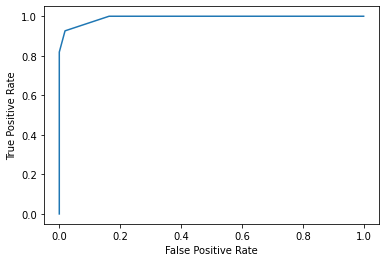

In [ ]:
#manhattan optimum k
y_pred_proba = knn_m.predict_proba(X_test_h)[::, 1] #predict proba
fpr, tpr, _ = metrics.roc_curve(y_test_h, y_pred_proba) #false positive rate tpr

#plot curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

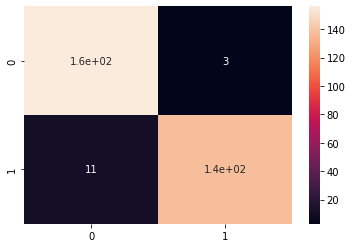

In [ ]:
conf_m = confusion_matrix(y_test_h, y_pred)
sns.heatmap(conf_m, annot=True) 

In [ ]:
#elbow curve for manhattan distance
error_rate = []
for i in range(1, 10):
  knn = KNeighborsClassifier(n_neighbors = i, metric = "manhattan")
  knn.fit(X_train_h, y_train_h)
  pred_i = knn.predict(X_test_h)
  error_rate.append(np.mean(pred_i != y_test_h))

Text(0, 0.5, 'Error Rate')

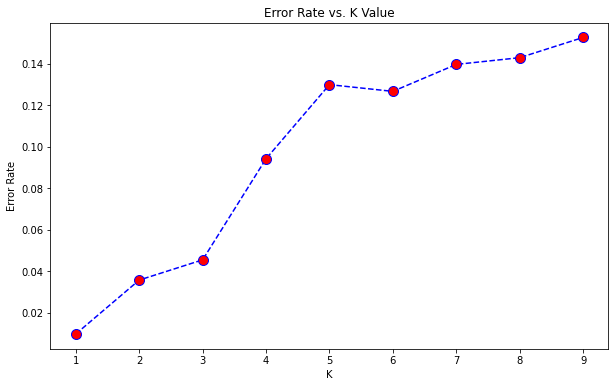

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color="blue", linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.title("Error Rate vs. K Value")
plt.xlabel("K")
plt.ylabel("Error Rate") # 2 and 3 optimum values slight difference we choose 3

In [ ]:
#cross validation euclidean distance 
knn_euc = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
cv_scores = cross_val_score(knn_euc, X, scaled_heart.target, cv = 5) #5 optimum value
print(cv_scores)
print('cv scores mean: {}'.format(np.mean(cv_scores)))

[0.86829268 0.84390244 0.82439024 0.83902439 0.8195122 ]
cv scores mean: 0.8390243902439025


In [ ]:
#cross validation euclidean k - nearset neighbor
knn_euc = KNeighborsClassifier(n_neighbors = 7, metric = 'euclidean')
cv_scores = cross_val_score(knn_euc, X, scaled_heart.target, cv = 5) #5 optimum
print(cv_scores)
print('cv scores mean: {}'.format(np.mean(cv_scores)))

[0.85853659 0.84390244 0.83414634 0.83902439 0.8097561 ]
cv scores mean: 0.8370731707317074


In [ ]:
knn_euc = KNeighborsClassifier(n_neighbors = 3, metric = 'euclidean') 
cv_scores = cross_val_score(knn_euc, X, scaled_heart.target, cv = 5) #5 optimum
print(cv_scores) 
print('cv scores mean: {}'.format(np.mean(cv_scores)))

[0.93658537 0.95121951 0.88780488 0.94146341 0.91219512]
cv scores mean: 0.9258536585365853


In [ ]:
#cross validation manhattan distance
knn_m = KNeighborsClassifier(n_neighbors = 5, metric = 'manhattan') 
cv_scores = cross_val_score(knn_m, X, scaled_heart.target, cv = 5) #5 optimum
print(cv_scores)
print('cv scores mean {}'.format(np.mean(cv_scores)))

[0.89268293 0.86341463 0.84390244 0.87317073 0.82439024]
cv scores mean 0.8595121951219513


In [ ]:
knn_m = KNeighborsClassifier(n_neighbors = 7, metric = 'manhattan') 
cv_scores = cross_val_score(knn_m, X, scaled_heart.target, cv = 5) #5 optimum 
print(cv_scores) 
print('cv scores mean {}'.format(np.mean(cv_scores))) 

[0.87804878 0.86341463 0.84878049 0.89756098 0.8195122 ]
cv scores mean 0.8614634146341464


In [ ]:
knn_m = KNeighborsClassifier(n_neighbors = 3, metric = 'manhattan') 
cv_scores = cross_val_score(knn_m, X, scaled_heart.target, cv = 5) 
print(cv_scores)  
print('cv scores mean {}'.format(np.mean(cv_scores)))

[0.93658537 0.95121951 0.90243902 0.96097561 0.93170732]
cv scores mean 0.9365853658536585


In [ ]:
#Gaussian Naive Bayes Hold out 
naive = GaussianNB()
naive.fit(X_train_h, y_train_h) #fit the data
y_predic_g = naive.predict(X_test_h) #predict the data 

In [ ]:
print(classification_report(y_test_h, y_predic_g))

              precision    recall  f1-score   support

           0       0.88      0.74      0.81       159
           1       0.76      0.89      0.82       149

    accuracy                           0.81       308
   macro avg       0.82      0.82      0.81       308
weighted avg       0.82      0.81      0.81       308



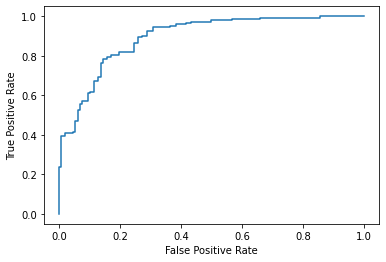

In [ ]:
#ROC Eğrisi KNN algoritması Naive Bayes ten daha iyi performans göstermektedir
y_pred_proba = naive.predict_proba(X_test_h)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test_h, y_pred_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate') 
plt.xlabel('False Positive Rate')
plt.show()

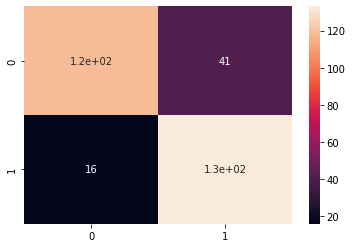

In [ ]:
#confusion matris hold out naive bayes 
conf_naive = confusion_matrix(y_test_h, y_predic_g) 
sns.heatmap(conf_naive, annot=True)

In [ ]:
#cross validation gaussian Bayes 
precision_scores = cross_val_score(estimator = naive, X = X, y = scaled_heart.target, scoring = 'precision', cv = 10) #10 fold cross validation stratified 
print(f"Precision mean {precision_scores.mean()}")
recall_scores = cross_val_score(estimator = naive, X = X, y = scaled_heart.target, scoring = 'recall', cv = 10) #10 fold cross validation stratified
print(f"Recall mean {recall_scores.mean()}")
f1_scores = cross_val_score(estimator = naive, X = X, y = scaled_heart.target, scoring = 'f1', cv = 10) #10 fold cross validation 
print(f"f1 mean {f1_scores.mean()}")
accuracy_scores = cross_val_score(estimator = naive, X = X, y = scaled_heart.target, scoring = 'accuracy', cv = 10) #10 fold cross validation
print(f"accuracy mean {accuracy_scores.mean()}")

Precision mean 0.8084329483281335
Recall mean 0.8572206095791002
f1 mean 0.8303315204086132
accuracy mean 0.821349704930516


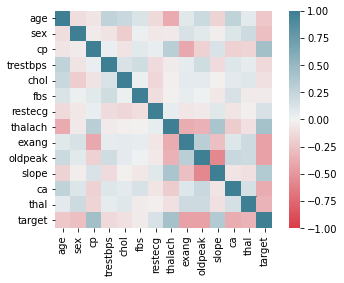

In [ ]:
#feature selection DecisionTreeClassifier information gain - correlation 
#öznitelikler arasında lineer korelasyonların bulunması ilişkilerin teyit edilmesi gereklidir
corr = scaled_heart.corr()
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin = -1.0, vmax = 1.0, square = True, cmap = cmap) #negatif ve pozitif korelasyonlar 


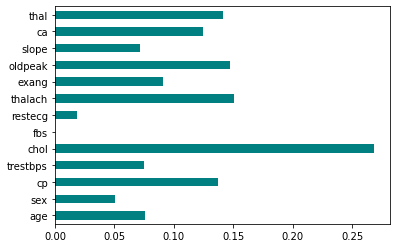

In [ ]:
#decision tree algoritmasının temel değerlerinden olan information gain değer bilgisi önemlidir
importances = mutual_info_classif(X, scaled_heart.target)
feat_performances = pd.Series(importances, scaled_heart.columns[0:len(scaled_heart.columns) - 1])
feat_performances.plot(kind = 'barh', color = 'teal')
plt.show()

/usr/local/lib/python3.7/dist-packages/skfeature/utility/construct_W.py:194: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  class_idx_all = class_idx[:, np.newaxis] & class_idx[np.newaxis, :]


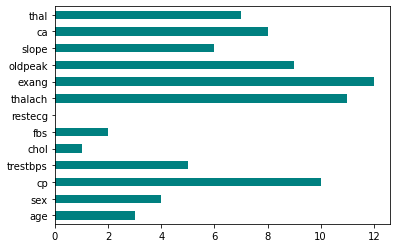

In [ ]:
#fisher score maximum fisher score information
ranks = fisher_score.fisher_score(X.to_numpy(), scaled_heart.target)

#plotting ranks
feat_importances = pd.Series(ranks, scaled_heart.columns[0:len(scaled_heart.columns) - 1])
feat_importances.plot(kind = 'barh', color = 'teal')
plt.show()

In [30]:
#fbs restecg sex age information gain öne çıkarılacak entropiyi öne alıyor 
redu_features = ["cp", "trestbps", "chol", "thalach", "exang", "oldpeak","slope","ca", "thal", "target"] #yeni featurelar
redu_data = scaled_heart.loc[:, redu_features]
redu_y = redu_data.loc[:, ['target']]

In [ ]:
redu_data.head() #head redu data

,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal,target
0,0.0,0.292453,0.196347,0.740458,0,0.161290,1.0,0.50,1.000000,0
1,0.0,0.433962,0.175799,0.641221,1,0.500000,0.0,0.00,1.000000,0
2,0.0,0.481132,0.109589,0.412214,1,0.419355,0.0,0.00,1.000000,0
3,0.0,0.509434,0.175799,0.687023,0,0.000000,1.0,0.25,1.000000,0
4,0.0,0.415094,0.383562,0.267176,0,0.306452,0.5,0.75,0.666667,0


In [31]:
features_t = ["cp", "trestbps", "chol", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
X = redu_data.loc[:, features_t] 
X_train, X_test, y_train, y_test = train_test_split(X, redu_data.target, random_state = 42, train_size = .70) #holdout decision tree support vector machine 

In [ ]:
#ağac olusturma decision tree ------- Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0) #max depth prediction
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

In [ ]:
#max depth = 2
print(classification_report(y_test, clf_predict))

              precision    recall  f1-score   support

           0       0.77      0.60      0.68       159
           1       0.66      0.81      0.72       149

    accuracy                           0.70       308
   macro avg       0.71      0.70      0.70       308
weighted avg       0.71      0.70      0.70       308



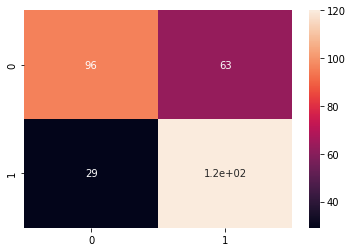

In [ ]:
#confusion matrix for max depth = 2
conf_2 = confusion_matrix(y_test, clf_predict)
sns.heatmap(conf_2, annot = True) 

[]

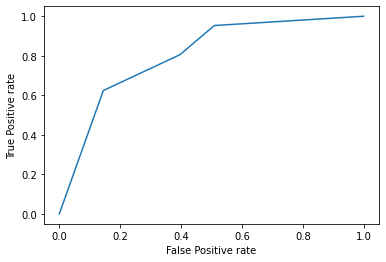

In [ ]:
y_pred_proba_2 = clf.predict_proba(X_test)[::, 1] 
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_2) 
plt.plot(fpr, tpr) 
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.plot()

In [ ]:
clf_none = DecisionTreeClassifier(random_state = 0)
clf_none.fit(X_train, y_train) 
clf_none_p = clf_none.predict(X_test)

In [ ]:
#max depth none 
print(classification_report(y_test, clf_none_p))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       159
           1       1.00      0.94      0.97       149

    accuracy                           0.97       308
   macro avg       0.97      0.97      0.97       308
weighted avg       0.97      0.97      0.97       308



max depth for none is 11


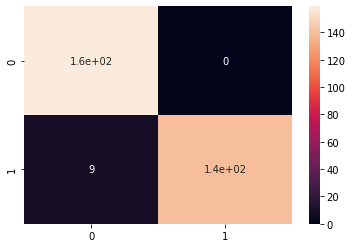

In [ ]:
conf_none = confusion_matrix(y_test, clf_none_p) #confusion matrix for none
sns.heatmap(conf_none, annot = True)
print("max depth for none is {}".format(clf_none.tree_.max_depth)) #11 derinlik 2 derinlikten daha iyi iş çıkarmış daha derin daha iyi olmuş

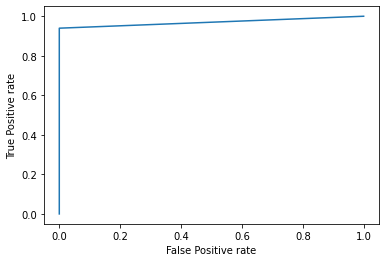

In [ ]:
#ROC curve for none
y_pred_proba_n = clf_none.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_n)  
plt.plot(fpr, tpr) 
plt.ylabel('True Positive rate') 
plt.xlabel('False Positive rate')
plt.show()

In [ ]:
#max depth kriteri agac budama için gereklidir 
#görülüyor ki sığ agaç derinliği daha düşük doğruluk oranı getirmektedir 
acc_rate = []
for i in range(1, 12):
  clf_d = DecisionTreeClassifier(max_depth = i, random_state = 0)
  clf_d.fit(X_train,y_train)
  clf_pred = clf_d.predict(X_test)
  acc = metrics.accuracy_score(y_test, clf_pred)
  acc_rate.append(acc)

Text(0, 0.5, 'acc')

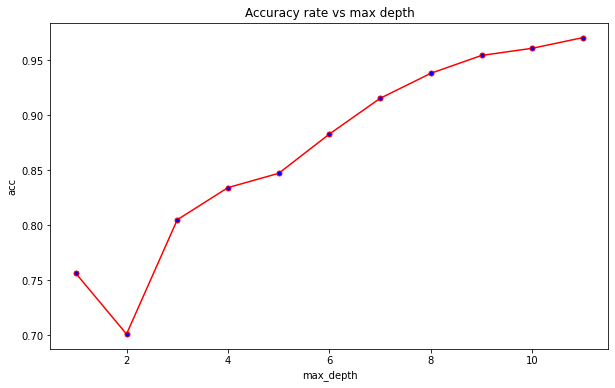

In [ ]:
plt.figure(figsize= (10, 6))
plt.plot(range(1, 12), acc_rate, color = "red", linestyle = '-', marker = 'o', markerfacecolor = 'blue', markersize = 5) 
plt.title('Accuracy rate vs max depth')
plt.xlabel('max_depth')
plt.ylabel('acc') #accuracy values

In [ ]:
#min samples split 
acc_min = []
for i in range(2, 41):
  clf_m = DecisionTreeClassifier(max_depth = 11, random_state = 0, min_samples_split = i)
  clf_m.fit(X_train, y_train) 
  clf_m_pred = clf_m.predict(X_test) 
  acc = metrics.accuracy_score(y_test, clf_m_pred)
  acc_min.append(acc)  

Text(0, 0.5, 'acc')

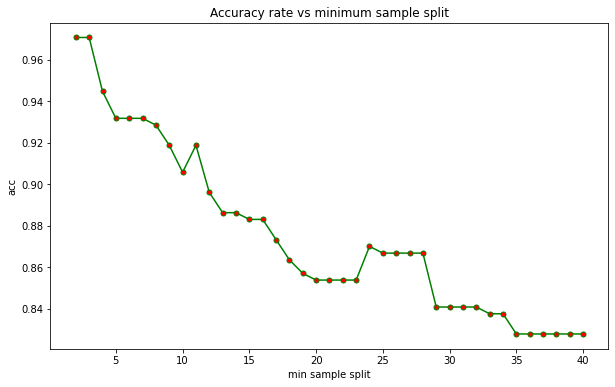

In [ ]:
plt.figure(figsize = (10, 6)) 
plt.plot(range(2, 41), acc_min, color = 'green', linestyle = '-', marker = 'o', markerfacecolor = 'red', markersize = 5) 
plt.title('Accuracy rate vs minimum sample split') 
plt.xlabel('min sample split') 
plt.ylabel('acc')

In [ ]:
#cross validation with max depth 11 and default min samples split
precision_scores = cross_val_score(estimator = clf_none, X = X_test, y = y_test, scoring = 'precision', cv = 10) #10 fold cross validation 
print(f'Precision mean {precision_scores.mean()}')
recall_scores = cross_val_score(estimator = clf_none, X = X_test, y = y_test, scoring = 'recall', cv = 10) #10 fold cross validation 
print(f'Recall mean {recall_scores.mean()}')
f1_scores = cross_val_score(estimator= clf_none, X = X_test, y = y_test, scoring = 'f1', cv = 10) #10 fold cross validation 
print(f'F1-score mean {f1_scores.mean()}')
accuracy_scores = cross_val_score(estimator = clf_none, X = X_test, y = y_test, scoring = 'accuracy', cv = 10) #10 fold cross validation  
print(f'Accuracy score mean {accuracy_scores.mean()}')

Precision mean 0.9111519607843137
Recall mean 0.8328571428571427
F1-score mean 0.8661905989923232
Accuracy score mean 0.8766666666666667


In [ ]:
#Logistic regression - hold out - reduced data
clfl = LogisticRegression(random_state = 0)
clfl.fit(X_train, y_train) 
clfl_p = clfl.predict(X_test) 

In [ ]:
print(classification_report(y_test, clfl_p))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79       159
           1       0.76      0.87      0.81       149

    accuracy                           0.80       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.81      0.80      0.80       308



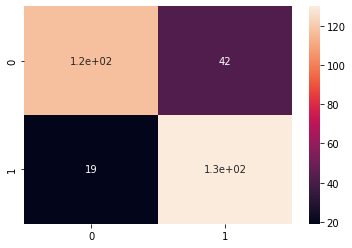

In [ ]:
conf_clfl = confusion_matrix(y_test, clfl_p)
sns.heatmap(conf_clfl, annot = True) 

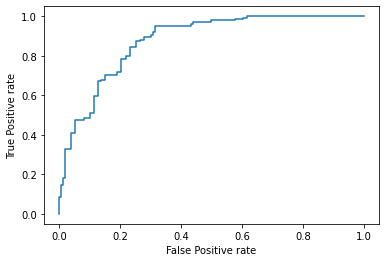

In [ ]:
#ROC curve for logistic
log_pred_proba = clfl.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, log_pred_proba)
plt.plot(fpr, tpr)
plt.ylabel('True Positive rate')
plt.xlabel('False Positive rate')
plt.show()

In [ ]:
#Multiple Linear regression -hold out - reduced data heart dataset is a classification dataset multiple features we use multiple features 
clfli = LinearRegression()
clfli.fit(X_train, y_train) 
#clfli_p = clfli.predict(X_test) 

LinearRegression()

In [ ]:
#print(classification_report(y_test, clfli_p))
r2_score = clfli.score(X_test, y_test) #lineer karşılıklar yok this model is not lineer but correlation exist 
print(f'determinasyon katsayısı :  {r2_score*100}')

determinasyon katsayısı :  40.6637098000416


In [ ]:
y_clfi_pred = clfli.predict(X_test)  
mae_clfi = mean_absolute_error(y_test, y_clfi_pred)
print(f'mean absolute error: {mae_clfi}')

mean absolute error: 0.3101654025889486


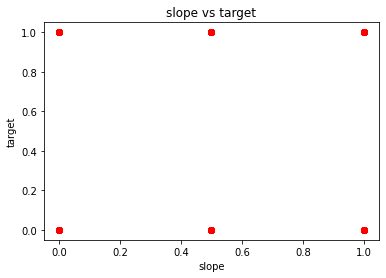

In [ ]:
#linear regression include one feature but our target value is not continuous classification data
plt.scatter(redu_data['slope'], redu_data['target'], color = 'red')
plt.title('slope vs target')
plt.xlabel('slope')
plt.ylabel('target')
plt.show()

In [ ]:
y = redu_data['target'].values.reshape(-1, 1)
X = redu_data['slope'].values.reshape(-1, 1) 
X_regtrain, X_regtest, y_regtrain, y_regtest = train_test_split(X, y, test_size = 0.3, random_state = 42) #SEED

In [ ]:
regressor = LinearRegression()
regressor.fit(X_regtrain, y_regtrain)

LinearRegression()

In [ ]:
r2_linear_score = regressor.score(X_regtest, y_regtest)
print(f'determinasyon katsayısı : {r2_linear_score*100}')

determinasyon katsayısı : 12.712368506031401


In [ ]:
yregpred = regressor.predict(X_regtest)
mae_reg = mean_absolute_error(y_regtest, yregpred) #we use mean absolute error for less punishable error differences 
print(f'mean absolute error: {mae_reg}')

mean absolute error: 0.4384935424351768


In [ ]:
#polinomial regression - hold out 
poly = PolynomialFeatures(degree = 2, include_bias = False) #do not include bias try polynomial instead linear
poly_features = poly.fit_transform(X) #fit transform 
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(poly_features, redu_data.target, test_size = 0.3, random_state=42)

In [ ]:
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_ptrain, y_ptrain)

LinearRegression()

In [ ]:
p_score = poly_reg_model.score(X_ptest, y_ptest)
print(f'determinasyon katsayısı : {p_score*100}')

determinasyon katsayısı : 10.884070989449246


In [ ]:
y_predicted = poly_reg_model.predict(X_ptest)
mae_ploy = mean_absolute_error(y_ptest, y_predicted)
print(f'mean absolute error: {mae_ploy}')

mean absolute error: 0.43209320185592676


In [ ]:
#multi layer perceptron denemesi - heart disease dataset 
X_train, X_test, y_train, y_test = train_test_split(X, scaled_heart.target, random_state = 42, train_size = .70) #hold out

In [ ]:
y_train = to_categorical(y_train, 2) #categorical
y_test = to_categorical(y_test, 2) #categorical

In [ ]:
#X_train.shape 64 32 16 klasik dizilim
model = Sequential()
model.add(Dense(64, input_shape = (13,), activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(2, activation='sigmoid'))

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 10, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/10
3/3 [==============================] - 1s 127ms/step - loss: 0.7293 - accuracy: 0.4834 - val_loss: 0.6712 - val_accuracy: 0.5903
Epoch 2/10
3/3 [==============================] - 0s 23ms/step - loss: 0.6776 - accuracy: 0.6161 - val_loss: 0.6363 - val_accuracy: 0.6875
Epoch 3/10
3/3 [==============================] - 0s 14ms/step - loss: 0.6361 - accuracy: 0.7086 - val_loss: 0.6023 - val_accuracy: 0.7569
Epoch 4/10
3/3 [==============================] - 0s 13ms/step - loss: 0.5978 - accuracy: 0.7592 - val_loss: 0.5718 - val_accuracy: 0.7986
Epoch 5/10
3/3 [==============================] - 0s 13ms/step - loss: 0.5626 - accuracy: 0.7749 - val_loss: 0.5460 - val_accuracy: 0.7917
Epoch 6/10
3/3 [==============================] - 0s 13ms/step - loss: 0.5334 - accuracy: 0.7836 - val_loss: 0.5230 - val_accuracy: 0.7847
Epoch 7/10
3/3 [==============================] - 0s 13ms/step - loss: 0.5073 - accuracy: 0.7993 - val_loss: 0.5047 - val_accuracy: 0.7639
Epoch 8/10
3/3 [==========

In [ ]:
#multi layer test results - evaluation 
test_results = model.evaluate(X_test, y_test, verbose=1)
print(f'test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

10/10 [==============================] - 0s 3ms/step - loss: 0.4418 - accuracy: 0.8019
test results - Loss: 0.4417631924152374 - Accuracy: 0.801948070526123%


In [ ]:
model2 = Sequential()
model2.add(Dense(64, input_shape=(13,), activation='tanh')) #(717, 13)
model2.add(Dense(32, activation='tanh')) #hidden layer
model2.add(Dense(32, activation='tanh')) #hidden layer
model2.add(Dense(2, activation='sigmoid')) #sigmoid softmax 2 

In [ ]:
from keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='loss', patience=3) #3 patience
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.fit(X_train, y_train, epochs = 50, batch_size = 150, verbose=1, callbacks = [callback], validation_split=0.2) 

Epoch 1/50
4/4 [==============================] - 1s 73ms/step - loss: 0.2951 - accuracy: 0.8848 - val_loss: 0.5038 - val_accuracy: 0.7986
Epoch 2/50
4/4 [==============================] - 0s 9ms/step - loss: 0.2991 - accuracy: 0.8831 - val_loss: 0.4846 - val_accuracy: 0.7986
Epoch 3/50
4/4 [==============================] - 0s 12ms/step - loss: 0.2955 - accuracy: 0.8796 - val_loss: 0.4860 - val_accuracy: 0.8125
Epoch 4/50
4/4 [==============================] - 0s 11ms/step - loss: 0.2954 - accuracy: 0.8901 - val_loss: 0.4881 - val_accuracy: 0.7986


In [ ]:
test_results = model2.evaluate(X_test, y_test, verbose=1)
print(f'test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

10/10 [==============================] - 0s 2ms/step - loss: 0.4179 - accuracy: 0.8149
test results - Loss: 0.4178774952888489 - Accuracy: 0.8149350881576538%


In [ ]:
from keras import Input
model3 = Sequential()
model3.add(Input(shape=(13, )))
model3.add(Dense(2, activation='sigmoid'))

In [ ]:
model3.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model3.fit(X_train, y_train, epochs = 50, batch_size = 150, verbose = 1, callbacks = [callback], validation_split=0.2)

Epoch 1/50
4/4 [==============================] - 1s 119ms/step - loss: 0.8519 - accuracy: 0.3229 - val_loss: 0.7938 - val_accuracy: 0.4167
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 0.8457 - accuracy: 0.3124 - val_loss: 0.7876 - val_accuracy: 0.3958
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.8392 - accuracy: 0.3054 - val_loss: 0.7817 - val_accuracy: 0.3958
Epoch 4/50
4/4 [==============================] - 0s 14ms/step - loss: 0.8334 - accuracy: 0.3002 - val_loss: 0.7760 - val_accuracy: 0.3958
Epoch 5/50
4/4 [==============================] - 0s 32ms/step - loss: 0.8278 - accuracy: 0.2949 - val_loss: 0.7707 - val_accuracy: 0.3889
Epoch 6/50
4/4 [==============================] - 0s 18ms/step - loss: 0.8220 - accuracy: 0.2914 - val_loss: 0.7659 - val_accuracy: 0.3819
Epoch 7/50
4/4 [==============================] - 0s 11ms/step - loss: 0.8169 - accuracy: 0.2810 - val_loss: 0.7614 - val_accuracy: 0.3681
Epoch 8/50
4/4 [==========

In [ ]:
test_results = model3.evaluate(X_test, y_test, verbose=1)
print(f'test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

10/10 [==============================] - 0s 2ms/step - loss: 0.6543 - accuracy: 0.6169
test results - Loss: 0.6542521119117737 - Accuracy: 0.6168830990791321%


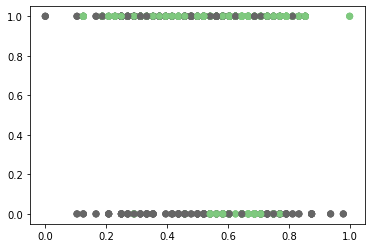

In [ ]:
import matplotlib.pyplot as plt #scatter plot the data
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=scaled_heart.target, cmap = 'Accent')

In [ ]:
#svm vektör machine - kernel function choice is important nonlinear is preference
clf = svm.SVC(kernel = 'poly', probability = True) #polynomial
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred)) #classification report of polynomial 

              precision    recall  f1-score   support

           0       0.90      0.79      0.84       159
           1       0.80      0.91      0.85       149

    accuracy                           0.84       308
   macro avg       0.85      0.85      0.84       308
weighted avg       0.85      0.84      0.84       308



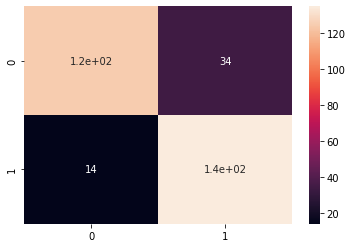

In [ ]:
#polynomial confusion
conf_poly = confusion_matrix(y_test, y_pred) #poly 
sns.heatmap(conf_poly, annot=True)

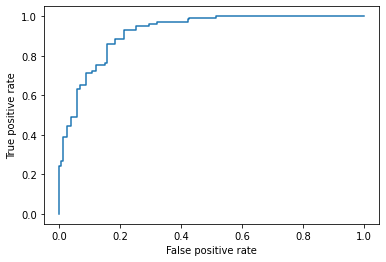

In [ ]:
#ROC curve for polynomial
y_pred_proba_n = clf.predict_proba(X_test)[::, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_n) 
plt.plot(fpr, tpr)
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [ ]:
#cross validation (10-fold)
precision_score = cross_val_score(estimator = clf, X = X_test, y = y_test, scoring = 'precision', cv = 10)
print(f'Precision mean {precision_score.mean()}')
recall_score = cross_val_score(estimator = clf, X = X_test, y = y_test, scoring = 'recall', cv = 10) 
print(f'Recall mean {recall_score.mean()}')
f1_score = cross_val_score(estimator = clf, X = X_test, y = y_test, scoring = 'f1', cv = 10)
print(f'F1-score mean {f1_score.mean()}')
accuracy_score = cross_val_score(estimator = clf, X = X_test, y = y_test, scoring = 'accuracy', cv = 10)
print(f'Accuracy mean {accuracy_score.mean()}')

Precision mean 0.7998669467787115
Recall mean 0.8661904761904763
F1-score mean 0.8306754558937539
Accuracy mean 0.8282795698924732


In [ ]:
#radial basis function kernel 
clf_rbf = svm.SVC(kernel = 'rbf', probability = True, C = 1000, gamma = 0.50) #radial basis
clf_rbf.fit(X_train, y_train) 
y_pred_rbf = clf_rbf.predict(X_test) 

In [ ]:
print(classification_report(y_test, y_pred_rbf)) 

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       159
           1       0.96      0.89      0.93       149

    accuracy                           0.93       308
   macro avg       0.93      0.93      0.93       308
weighted avg       0.93      0.93      0.93       308



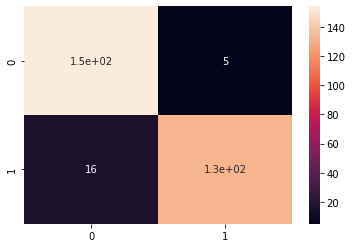

In [ ]:
#polynomial function
conf_rbf = confusion_matrix(y_test, y_pred_rbf) #confusion matrix
sns.heatmap(conf_rbf, annot = True) 

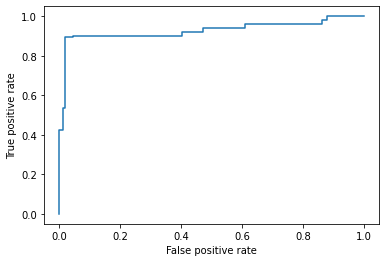

In [ ]:
#ROC curve for polynomial function
y_pred_proba_rbf = clf_rbf.predict_proba(X_test)[::, 1]  
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba_rbf)  
plt.plot(fpr, tpr)
plt.ylabel('True positive rate') 
plt.xlabel('False positive rate') 
plt.show()

In [ ]:
#cross validation (10-fold)
precision_score = cross_val_score(estimator = clf_rbf, X = X_test, y = y_test, scoring = 'precision', cv = 10)
print(f'Precision mean {precision_score.mean()}')
recall_score = cross_val_score(estimator = clf_rbf, X = X_test, y = y_test, scoring = 'recall', cv = 10) 
print(f'Recall mean {recall_score.mean()}')
f1_score = cross_val_score(estimator = clf_rbf, X = X_test, y = y_test, scoring = 'f1', cv = 10)
print(f'F1-score mean {f1_score.mean()}')
accuracy_score = cross_val_score(estimator = clf_rbf, X = X_test, y = y_test, scoring = 'accuracy', cv = 10)
print(f'Accuracy mean {accuracy_score.mean()}')

Precision mean 0.8578571428571428
Recall mean 0.8328571428571427
F1-score mean 0.8435570386849586
Accuracy mean 0.8507526881720429


Text(0, 0.5, 'target (heart disease positive or negative)')

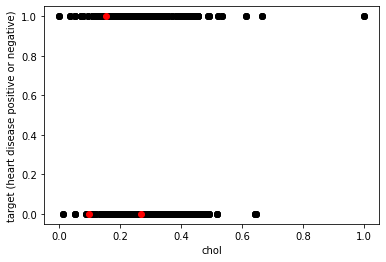

In [ ]:
#k-means algoritması
#features 
features2 = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
Xtwo = scaled_heart.loc[:, features2] #all features heart disease dataset

Centroids = (Xtwo.sample(n = 3)) #3 centroid
plt.scatter(Xtwo["chol"], Xtwo["target"], c = 'black')
plt.scatter(Centroids["chol"],Centroids["target"], c = 'red')
plt.xlabel("chol")
plt.ylabel("target (heart disease positive or negative)")

Text(0, 0.5, 'Inertia')

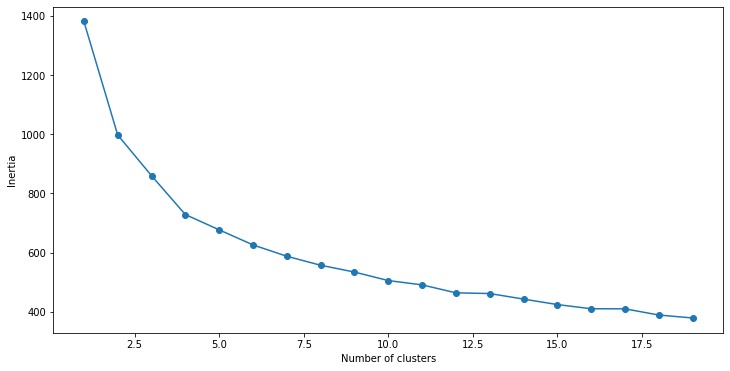

In [ ]:
from sklearn.cluster import KMeans #kmeans portal find cluster number
SSE = []
for cluster in range(1, 20):
  kmeans = KMeans(n_clusters = cluster, init = 'k-means++')
  kmeans.fit(scaled_heart)
  SSE.append(kmeans.inertia_)

#plot the dataframe of clusters
frame = pd.DataFrame({'Cluster':range(1, 20), 'SSE': SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [2]:
#SOM denemesi - susi kütüphanesi
!pip install susi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for susi: filename=susi-1.2.2-py3-none-any.whl size=26887 sha256=8d2f28d056eff2e816f7475b5c03292145dfc528723d86eef7a911cebc18b896
  Stored in directory: /root/.cache/pip/wheels/64/92/5a/e1f074c01d012280ae50ccfb92b0f6816757711223be0fabb4
Successfully built susi


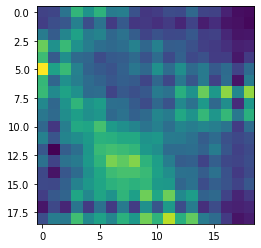

In [13]:
import susi 
som = susi.SOMClustering() #clustering 
som.fit(X) #fit the data to SOM
umat = som.get_u_matrix() #matrix
plt.imshow(np.squeeze(umat)) #squeeze

In [27]:
#error endeksi fonksiyonu 
error = som.get_quantization_error(np.array(X)) #takes array 
print("Quantization error for Heart Disease public data set " + str(error))

Quantization error for Heart Disease public data set 20.381739744826845


In [33]:
#reduced data Heart Disease public data set 
som2 = susi.SOMClustering()
som2.fit(X) #fit the data
error_redu = som2.get_quantization_error(np.array(X)) #error float
print("Quantization error for reduced Heart Disease public data set " + str(error_redu))

Quantization error for reduced Heart Disease public data set 13.805970693906959


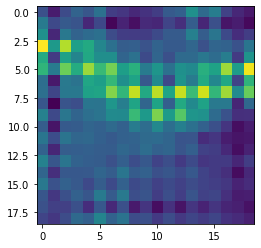

In [36]:
umat2 = som2.get_u_matrix()
plt.imshow(np.squeeze(umat2)) #squeeze

In [28]:
#LVQ - Turing code
import math #we have to import math function
def lvq_train(X, y, a, b, max_ep, min_a, e):
    c, train_idx = np.unique(y, True)
    r = c
    W = X[train_idx].astype(np.float64)
    train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])
    X = train[:, 0]
    y = train[:, 1]
    ep = 0
 
    while ep < max_ep and a > min_a:
        for i, x in enumerate(X):
            d = [math.sqrt(sum((w - x) ** 2)) for w in W] #uzaklık hesaplaması
            min_1 = np.argmin(d)
 
            min_2 = 0
            dc = float(np.amin(d))
            dr = 0
            min_2 = d.index(sorted(d)[1])
            dr = float(d[min_2])
            if c[min_1] == y[i] and c[min_1] != r[min_2]:
                W[min_1] = W[min_1] + a * (x - W[min_1])
 
            elif c[min_1] != r[min_2] and y[i] == r[min_2]:
                if dc != 0 and dr != 0:
 
                    if min((dc/dr),(dr/dc)) > (1-e) / (1+e):
                        W[min_1] = W[min_1] - a * (x - W[min_1])
                        W[min_2] = W[min_2] + a * (x - W[min_2])
            elif c[min_1] == r[min_2] and y[i] == r[min_2]:
                W[min_1] = W[min_1] + e * a * (x - W[min_1])
                W[min_2] = W[min_2] + e * a * (x- W[min_2])
        a = a * b
        ep += 1
    return W, c

In [29]:
#test the LVQ algorithm
def lvq_test(x, W):
    
    W, c = W
    d = [math.sqrt(sum((w - x) ** 2)) for w in W]
 
    return c[np.argmin(d)]

In [39]:
#reduced hold out train set
w = lvq_train(np.array(X_train), y_train, 0.2, 0.5, 100, 0.001, 0.3) #train 

<ipython-input-28-b05c825cafe1>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([e for i, e in enumerate(zip(X, y)) if i not in train_idx])


In [40]:
predicted = []
for i in np.array(X_test):
  predicted.append(lvq_test(i, w))

In [41]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       159
           1       0.75      0.88      0.81       149

    accuracy                           0.80       308
   macro avg       0.81      0.80      0.80       308
weighted avg       0.81      0.80      0.80       308

